<a href="https://colab.research.google.com/github/difo23/BitacorasDataScienceDominicano/blob/master/BitacoraBigO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bitácora sobre Big O (Oh Asymptotic Analysis)
Análisis de Algoritmos y su complejidad.

### **¿Cuando un algoritmo o estructura de datos es mejor que otra?**

## Conceptos fundamentales de la computación:

### Estructura de Datos:

 Es una manera sistemática de organizar y acceder a los datos.





### Algoritmo:
 Es un procedimiento para realizar una tarea paso a paso en una cantidad de tiempo finita.

### Librerias Random y Time

In [0]:
from random import randrange
from time import time
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

## Algoritmos de ordenamiento

### Análisis tiempo de ejecución vs Tamaño de la entrada:

* La primera herramienta de análisis para los algoritmos y estructuras de datos involucra el tiempo de ejecución para eso usaremos la librería 'Time'.

* El algortimo con el promedio de tiempo de ejecución mas bajo sera el ganador.



### Generando datos de prueba

In [0]:
"""
Genero n datos de prueba entre 0 n aleatoriamente.
"""
def generaDatosPrueba(n):
  datosPrueba= []
  for valor in range(n):
    datosPrueba.append(randrange(n))
  return datosPrueba
  


In [0]:


def testAlgoritmo(datos, algoritmo):
  tiempo = []
  for elemento in datos:
    #print( "Inicio Prueba de tiempo para "+str(elemento)+":\n")
    start = time()
    algoritmo(generaDatosPrueba(elemento))
    end = time()
    tiempoEjecucion = end-start
    #print (tiempoEjecucion)
    tiempo.append(tiempoEjecucion)
  return tiempo
  



### Algortimo BubbleSort
Complejidad: $O(n²)$

In [0]:
def bubbleSort(seq):
    if seq.__len__() <= 1: 
        return seq
    
    seqSize = seq.__len__()
    aux = 0
    for i in range(1,seqSize):
        for j in range(0, seqSize-i):
            if seq[j] > seq[j+1]:
                aux = seq[j]
                seq[j] = seq[j+1]
                seq[j+1] = aux     
    return seq

In [0]:
datosCantidad = range(10, 10000, 100)

tiemposbubbleSort = testAlgoritmo(datosCantidad, bubbleSort)

In [131]:
df_burbuja = pd.DataFrame({
    'input_size': datosCantidad,
    'tiempo_ejecucion':tiemposbubbleSort
})

df_burbuja.head(15)

,input_size,tiempo_ejecucion
0,10,0.000049
1,110,0.001335
2,210,0.002880
3,310,0.013609
4,410,0.015296
5,510,0.018193
6,610,0.026106
7,710,0.035702
8,810,0.045751
9,910,0.059973


In [134]:
np.mean(tiemposbubbleSort) # promedio de tiempo bubbleSort

2.5421057319641114

In [65]:
import altair as alt

interval = alt.selection_interval()

points = alt.Chart(df_burbuja).mark_point().encode(
  x='tiempo_ejecucion',
  y='input_size',
  color=alt.condition(interval, 'input_size', alt.value('lightgray'))
).properties(
  selection=interval
)



points 

alt.Chart(...)

### Algoritmo HeapSort
Complejidad: $O(n *log( n))$

In [0]:
def heapSort(lst):

    for start in range(int((len(lst)-2)/2), -1, -1):
      siftdown(lst, start, len(lst)-1)
 
    for end in range(len(lst)-1, 0, -1):
      lst[end], lst[0] = lst[0], lst[end]
      siftdown(lst, 0, end - 1)
    return lst
 
def siftdown(lst, start, end):
  root = start
  while True:
        child = root * 2 + 1
        if child > end: break
        if child + 1 <= end and lst[child] < lst[child + 1]:
            child += 1
        if lst[root] < lst[child]:
            lst[root], lst[child] = lst[child], lst[root]
            root = child
        else:
             break


In [0]:


tiemposheapSort = testAlgoritmo(datosCantidad, heapSort)

In [63]:
df_heapSort = pd.DataFrame({
    'input_size': datosCantidad,
    'tiempo_ejecucion':tiemposheapSort
})

df_heapSort.head(15)

,input_size,tiempo_ejecucion
0,10,0.000090
1,110,0.000569
2,210,0.001233
3,310,0.001959
4,410,0.001875
5,510,0.001764
6,610,0.002189
7,710,0.002748
8,810,0.003019
9,910,0.003352


In [133]:
np.mean(tiemposheapSort) #promedio de tiempo heapSort

0.023761510848999023

In [64]:
import altair as alt

interval = alt.selection_interval()

points = alt.Chart(df_heapSort).mark_point().encode(
  x='tiempo_ejecucion',
  y='input_size',
  color=alt.condition(interval, 'input_size', alt.value('lightgray'))
).properties(
  selection=interval
)



points 

alt.Chart(...)

## Problemas con el metódo de análisis tiempo de ejcucion vs tamaño de la entrada:

* Es difícil comparar el tiempo de ejecución de 2 algoritmos a menos que el experimento se lleve a cabo en el mismo ambiente de hardware y software.

* El experimento sólo puede ser realizado con un número limitado de entradas para pruebas, de esta forma siempre se dejarán fuera datos de prueba que podrían ser importantes.


* Un algoritmo debe implementarse completamente para ejecutarlo y estudiar su tiempo de ejecución experimentalmente.


## Análisis Eficiente de los algoritmos:


* Debe ser posible permitirnos evaluar la eficiencia relativa de cualquiera de los dos algoritmos de manera que sea independiente del ambiente de hardware y software.

* Se puede realizar el estudio del algoritmo con un nivel alto de descripción sin necesidad de implementación de dicho algoritmo.

* Toma en cuenta todas las posibles entradas.


### Para realizar este análisis es necesario:



1.   Contar con las operaciones primitivas que realizan los algortimos.
2.   Medir operaciones como una función del tamaño de entrada.

    $S = F(N)$;
    Donde S es pasos a realizar por el algoritmo,
    N es tamaño de los datos.
3. Enfocarse en el peor de los casos posibles de los valores de entrada.



### Los 7 tipos de funciones más utilizadas en el análisis de algortimos:

#### La función constante:
$f(n)=c$

In [0]:
n = range(10, 1000, 10)
c = np.ones(len(n))*10
df = pd.DataFrame({
    'input': n,
    'pasos':c
})


In [98]:


interval = alt.selection_interval()

points = alt.Chart(df).mark_point().encode(
  x='pasos',
  y='input',
  color=alt.condition(interval, 'input', alt.value('lightgray'))
).properties(
  selection=interval
)

points 

alt.Chart(...)

#### La función Logarítmica:
$f(n)= log_b(n) , b > 1$ 

In [0]:

n = range(10, 1000, 10)
c1 = np.log10(n)
df = pd.DataFrame({
    'input': n,
    'pasos':c1
})



In [95]:
interval = alt.selection_interval()

points = alt.Chart(df).mark_point().encode(
  x='pasos',
  y='input',
  color=alt.condition(interval, 'input', alt.value('lightgray'))
).properties(
  selection=interval
)

points 

alt.Chart(...)

#### La función Lineal:
$f(n)= n$ 

In [0]:
n = range(10, 1000, 10)
c2 = (n)
df = pd.DataFrame({
    'input': n,
    'pasos':c2
})

In [102]:
interval = alt.selection_interval()

points = alt.Chart(df).mark_point().encode(
  x='pasos',
  y='input',
  color=alt.condition(interval, 'input', alt.value('lightgray'))
).properties(
  selection=interval
)

points 

alt.Chart(...)

#### La función N Log N:
$f(n)= n* log (n)$ 

In [0]:
n = range(10, 1000, 10)
c3 = np.log10(n)*n
df = pd.DataFrame({
    'input': n,
    'pasos':c3
})

In [105]:
interval = alt.selection_interval()

points = alt.Chart(df).mark_point().encode(
  x='pasos',
  y='input',
  color=alt.condition(interval, 'input', alt.value('lightgray'))
).properties(
  selection=interval
)

points 

alt.Chart(...)

#### La función Cuadrática:
$f(n)= n²$ 

In [0]:
n = range(10, 1000, 10)
c4 = np.power(n,2)
df = pd.DataFrame({
    'input': n,
    'pasos':c4
})

In [109]:
interval = alt.selection_interval()

points = alt.Chart(df).mark_point().encode(
  x='pasos',
  y='input',
  color=alt.condition(interval, 'input', alt.value('lightgray'))
).properties(
  selection=interval
)

points 

alt.Chart(...)

#### La función polinomial:
$f(n)= a_0 + a_1*n+ a_2*n^2+ ... + a_d*n^d $ 

In [0]:
n = range(10, 1000, 10)
c5 = 100+9*np.power(n,1)+5*np.power(n,2)+2*np.power(n,3)
df = pd.DataFrame({
    'input': n,
    'pasos':c5
})

In [111]:
interval = alt.selection_interval()

points = alt.Chart(df).mark_point().encode(
  x='pasos',
  y='input',
  color=alt.condition(interval, 'input', alt.value('lightgray'))
).properties(
  selection=interval
)

points 

alt.Chart(...)

#### La función Exponencial:
$f(n)= b^n$ 

In [0]:
n = range(1, 10, 1)
c6 = np.power(3,n)
df = pd.DataFrame({
    'input': n,
    'pasos':c6
})

In [130]:
interval = alt.selection_interval()

points = alt.Chart(df).mark_point().encode(
  x='pasos',
  y='input',
  color=alt.condition(interval, 'input', alt.value('lightgray'))
).properties(
  selection=interval
)

points 

alt.Chart(...)

### Big O (Oh Asymptotic Analysis)

En forma simple es como tomar una gran fotografía de una función y quedarnos con una función más manejable.

Podemos decir que $f(n)$ es $O(g(n))$ entonces $f(n)>= c*g(n)$ cuando $n >= n0$. “$f(n)$ es big O de $g(n)$”



#### Ejemplo 1: $f(n)=8n+5$ es $O(n)$ (es lineal) 

Para demostrar esto necesito una constante $c > 0$
; una constante entera $n0 >1$.
Con esto debe complirse que $8n+5$ $<=$ $c*n$ para cualquier entero $n$$>=$$n0$ 

##### Caso 1: n0 = 5 y C = 9

In [0]:
n = np.array(range(0, 10, 1))
c = 9
cxn = n*c
fx = 8*n+5

df = pd.DataFrame({
    'n': n,
    'cxn':cxn,
    'fx': fx
})

In [140]:
df.head(10)

,n,cxn,fx
0,0,0,5
1,1,9,13
2,2,18,21
3,3,27,29
4,4,36,37
5,5,45,45
6,6,54,53
7,7,63,61
8,8,72,69
9,9,81,77


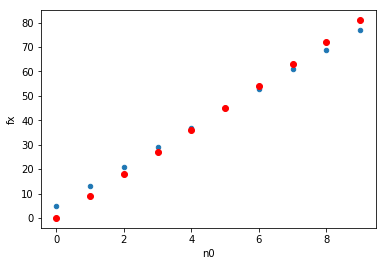

In [165]:
%matplotlib inline
df.plot(kind= 'scatter', x = "n", y= "fx")
plt.plot(df['n'], df['cxn'], 'ro')

 f(n)>=c∗g(n) cuando  n>=n0 se cumple para el caso n0  = 5 y c = 9

Caso 2: n0 = 1 y C = 13

In [0]:
n = np.array(range(0, 10, 1))
c = 13
cxn = n*c
fx = 8*n+5

df = pd.DataFrame({
    'n': n,
    'cxn':cxn,
    'fx': fx
})

In [167]:
df.head(10)

,n0,cxn,fx
0,0,0,5
1,1,13,13
2,2,26,21
3,3,39,29
4,4,52,37
5,5,65,45
6,6,78,53
7,7,91,61
8,8,104,69
9,9,117,77


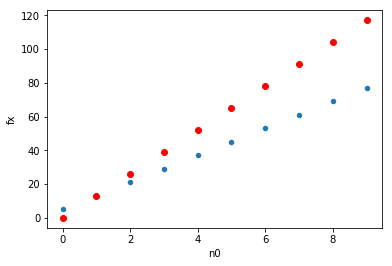

In [169]:
%matplotlib inline
df.plot(kind= 'scatter', x = "n", y= "fx")
plt.plot(df['n'], df['cxn'], 'ro')

 f(n)>=c∗g(n) cuando  n>=n0 se cumple para el caso n0  = 1 y c = 13

## Algunas propiedas del Big Oh Notation:

La notación big O nos permite ignorar factores constantes y términos de bajo-orden y nos enfoca en los componentes principales de una función, el componente  que más afecta el crecimiento de la función .

Ejemplo: $5n⁴+3n²+4n+1$ es $O(n⁴)$

$n⁴$ es el factor que mas afecta el crecimiento de la funcion anterior.

$5n⁴+3n³+2n²+4n+1$ $<=$ $(5+3+2+4+1)n⁴$ entonces
$c=(5+3+2+4+1)=15$ y
$n0>1$
 



$5n⁴+3n³+2n²+4n+1$ $<=$ $15n⁴$



In [0]:
n = np.array(range(0, 10, 1))
c = 15
cxn = np.power(n,4)*c
fx = 5*np.power(n,4)+3*np.power(n,3)+2*np.power(n,2)+4*n+1

df = pd.DataFrame({
    'n': n,
    'cxn':cxn,
    'fx': fx
})

In [0]:
%matplotlib inline
df.plot(kind= 'scatter', x = "n", y= "fx")
plt.plot(df['n'], df['cxn'], 'ro')

## ¿ Como sacar estas ecuaciónes de un algoritmo hecho en código o pseudocódigo? 

### Análisis del algoritmo InsertionSort


1. Deseamos obtener el tiempo de ejecucion:
$f(n)->$ número de pasos 

2. El tiempo de ejecución es usualmente función del tamaño de entrada. $-> n$

### Cálculo del tiempo de ejecución (Modelo RAM(Random Access Machine))

1. Cada línea de código se ejecuta en un tiempo constante ($c_i$)
2. Una línea puede tomar una cantidad de tiempo diferente a otra línea ($c_1$ vs $c_2$)
3. El tiempo total de ejecución de una línea dependera de la constante de tiempo ($c_i$) y la cantidad de vcs que esta se ejecuta.

4. El tiempo total de ejecución ($T_n$) es la suma del tiempo de ejecución de todas sus líneas.

#### Algoritmo Insertion Sort: Este algoritmo en el peor de los caso es O(n^2)


In [0]:
seq = [3,4,2,5,6,1,3,4]
n = len(seq)

In [0]:
def insertion_sort(seq):
    for i in range(1, len(seq)): # inicio linea 2
        j = i-1 
        key = seq[i]
        while (seq[j] > key) and (j >= 0):
           seq[j+1] = seq[j]
           j -= 1
        seq[j+1] = key # fin linea 8
    return seq

In [186]:
(n,insertion_sort(seq))

(8, [1, 2, 3, 3, 4, 4, 5, 6])

In [197]:
lineas_codigo= np.array(range(2,9, 1 ))
lineas_codigo

array([2, 3, 4, 5, 6, 7, 8])

In [198]:
times = ['n', 'n-1', 'n-1', 'suma de j=2 a n, de tj', 'suma de j=2 a n, de tj-1', 'suma de j=2 a n, de tj-1', 'n-1']
times

['n',
 'n-1',
 'n-1',
 'suma de j=2 a n, de tj',
 'suma de j=2 a n, de tj-1',
 'suma de j=2 a n, de tj-1',
 'n-1']

Nota: $t_j$ es el número de vcs que el ciclo while en $linea 5$  es ejecutado para ese valor $j$

In [0]:
constantes = ['c1','c2', 'c3', 'c4', 'c5', 'c6', 'c7']

In [203]:
df = pd.DataFrame({
    'lineas': lineas_codigo,
    'times':times,
    'constantes': constantes
})
df.head(8)

,lineas,times,constantes
0,2,n,c1
1,3,n-1,c2
2,4,n-1,c3
3,5,"suma de j=2 a n, de tj",c4
4,6,"suma de j=2 a n, de tj-1",c5
5,7,"suma de j=2 a n, de tj-1",c6
6,8,n-1,c7


El costo de tiempo total $T(n)$= suma de (los costos x vcs) en cada línea.

$T(n)= c_1*n+c_2*(n-1)+c_3*(n-1)+c_4*(\sum_{j=2}^{n}t_j) 
+c_5*(\sum_{j=2}^{n}t_j-1)+c_6*(\sum_{j=2}^{n}t_j-1)+c_7*(n-1)$

#### Caso 1: En el mejor de los casos los números ya estan ordenados en la lista.

Nota= En este caso $t_j = 1$ entonces $c_4*(\sum_{j=2}^{n}t_j)= c_4(n-1)$   y las lineas 6 y 7 se ejecutan 0 vcs





$T(n)= c_1*n+c_2*(n-1)+c_3*(n-1)+c_4(n-1)
+c_7*(n-1)$

$T(n)= (c_1+c_2+c_3*+c_4+c_7)*n+(c_2+c_3*+c_4+c_7)$

$T(n)= C*n+C'$ entonces aplicando propiedas es O(n), es lineal

#### Caso 2: Para el peor caso los números estan en orden inverso.

Nota= En este caso $t_j = j$ entonces $c_4*(\sum_{j=2}^{n}t_j)= c_4((n(n+1)/2)-1)$   y las lineas 6 y 7 se ejecutan $(\sum_{j=2}^{n}t_j-1) = n(n-1)/2$ vcs

En la linea anterio se aplico la formula de Gauss sobre la sumatoria cunado $t_j = j$ [Formula de Gauss](https://www.youtube.com/watch?v=gp9jNcnvheI)

$T(n)= c_1*n+c_2*(n-1)+c_3*(n-1)+c_4*((n(n+1)/2)-1)  
+c_5*n(n−1)/2+c_6*n(n−1)/2+c_7*(n-1)$

Aplicando álgebra de toda la vida a lo anterior me queda una ecuacion del tipo:  $an^2+bn+c$

La Big O aplicando las propiedades es O(n²) una funcion cuadratica 

# Por Fin se termino lo esencial....
Investigar sobre [Problemas P y NP](https://www.youtube.com/watch?v=UR2oDYZ-Sao)